In [1]:
packages <- c("igraph", "ggplot2", "ggraph")
lapply(packages, library, character.only=TRUE, warn.conflicts=FALSE)

[[1]]
[1] "igraph"    "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[7] "methods"   "base"     

[[2]]
[1] "ggplot2"   "igraph"    "stats"     "graphics"  "grDevices" "utils"    
[7] "datasets"  "methods"   "base"     

[[3]]
 [1] "ggraph"    "ggplot2"   "igraph"    "stats"     "graphics"  "grDevices"
 [7] "utils"     "datasets"  "methods"   "base"

In [2]:
df <- read.csv("../data/google-books-transition-frequencies.csv", header=TRUE, row.names=1)

In [3]:
make_bigrams <- function(word) {
  bigram_vec = c()
  chars <- strsplit(tolower(word), split="")[[1]]
  for (idx in seq_along(chars)) {
    while (idx < length(chars)) {
      bigram <- paste0(chars[idx], chars[idx+1])
      bigram_vec <- c(bigram_vec, bigram)
      idx <- idx+length(chars)
    }
  }
  return(bigram_vec)
}

In [4]:
get_frequencies <- function(bigram_vec, freq_data) {
  bigram_freq = c()
  for (idx in seq_along(bigram_vec)) {
    bigram <- strsplit(bigram_vec[idx], split="")[[1]]
    pair <- freq_data[bigram[2], bigram[1]]
    bigram_freq <- c(bigram_freq, pair)
  }
  return(bigram_freq)
}

In [5]:
make_network <- function(word, weight) {
  source = c(1:length(word))
  target = c(1:length(word)+1)
  links <- data.frame(source, target, weight)
  network <- graph_from_data_frame(d=links, directed=TRUE)
  return(network)
}

In [6]:
plot_network <- function(word, network) {
  set.seed(5)
  chars <- strsplit(word, split="")[[1]]
  ggraph(network, layout="linear") +
    theme_graph(background="white") +
    geom_edge_link(aes(edge_width=(I(frequencies)*100)),
                   show.legend=FALSE) +
    geom_node_point(size=0,
                    alpha=0,
                    x=-1) +
    geom_node_label(aes(label=chars),
                    #family="Futura",
                    color="black",
                    size=8,
                    alpha=0,
                    y=-0.03,
                    label.size=0,
                    show.legend=FALSE)
}

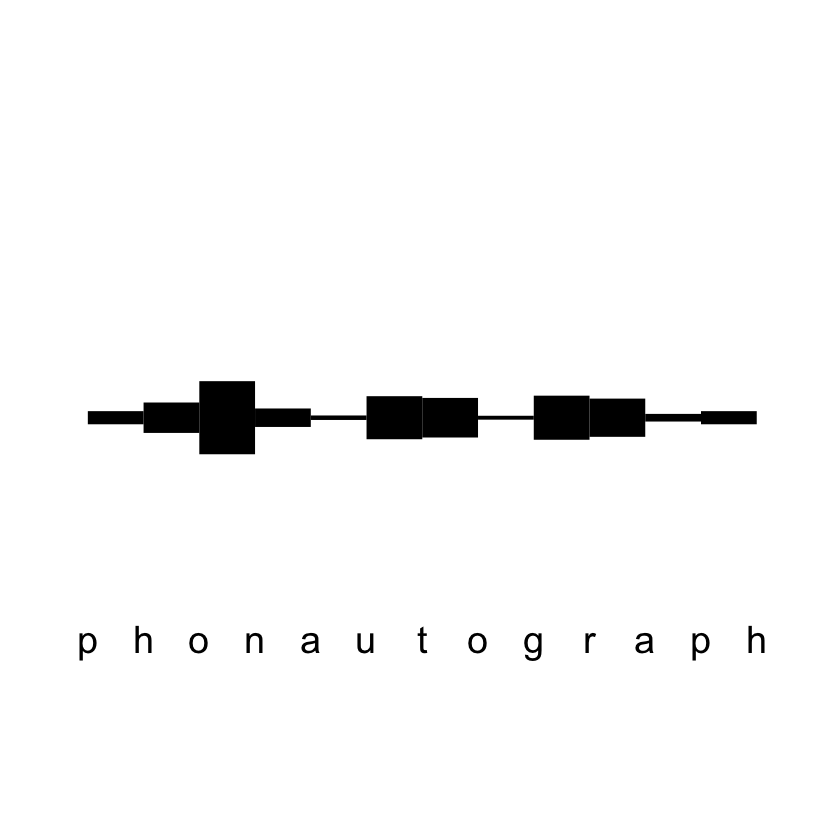

In [7]:
word <- "phonautograph"
bigrams <- make_bigrams(word)
frequencies <- get_frequencies(bigrams, df)
network <- make_network(bigrams, frequencies)
plot_network(word, network)